# <center> Курсовая работа </center>
# <center>Анализ данных из социальных сетей</center>
# <center>Соловьев Илья</center>
# <center>Высшая Школа Экономики</center>
# <center>Нижний Новгород 2020</center>

Основная задачи данной курсовой 
- изучить методы анализа данных 
- изучить регрессионные модели
- изучить виды нейронных сетей и подходы к их проектированию
- применить полученные знания и навыки на практике, а именно в анализе данных с сайта Auto.Ru, построить модель, предсказывающую цену автомобиля по его признакам

In [33]:
!git clone https://github.com/keras-team/keras-tuner/
%cd keras-tuner
!pip install .

Cloning into 'keras-tuner'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 6416 (delta 1), reused 1 (delta 0), pack-reused 6402
Receiving objects: 100% (6416/6416), 1.99 MiB | 19.83 MiB/s, done.
Resolving deltas: 100% (4482/4482), done.
/content/keras-tuner/keras-tuner
Processing /content/keras-tuner/keras-tuner
  Created wheel for keras-tuner: filename=keras_tuner-1.0.0-cp36-none-any.whl size=88850 sha256=cfc53b55e13be467f858901e332bc6349b1638cec635e0fc761f619b4aebf863
  Stored in directory: /root/.cache/pip/wheels/e8/c5/73/527fcfcee016e043af93334d84312eabb127595efdff6f7b11
Successfully built keras-tuner
  Found existing installation: keras-tuner 1.0.0
    Uninstalling keras-tuner-1.0.0:
      Successfully uninstalled keras-tuner-1.0.0


In [0]:
from google.colab import files
from kerastuner.tuners import RandomSearch, Hyperband, BayesianOptimization
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import RadiusNeighborsRegressor, KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics, preprocessing
from statistics import mean
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Загрузка данных и первоначальный анализ



### Ифнормация о данных

In [0]:
df=pd.read_csv('/content/drive/My Drive/Курсач/Colab Notebooks/autoRu.csv', sep = ';')

In [36]:
df_for_test = df.copy(deep=True)
df

,Mark_info,Model_info,Year,Price_segment,Transmission,Gear_type,Fuel_rate,Vendor_country,Region,Mileage,Horse_power,Owners_number,Body_type,PTS,Color_hex,Salon,Count_doors,Auto_class,Trunk_volume_min,Price_rub
0,Volkswagen,Polo,2011,ECONOMY,AUTOMATIC,FORWARD_CONTROL,7.0,EUROPEAN,Москва,81000,105.0,3.0,SEDAN,True,0000CC,False,4,B,460.0,279000
1,Lexus,LX,2015,PREMIUM,AUTOMATIC,ALL_WHEEL_DRIVE,14.4,JAPANESE,Екатеринбург,105500,367.0,2.0,ALLROAD_5_DOORS,True,040001,False,5,J,258.0,4570000
2,Kia,Stinger,2018,MEDIUM,AUTOMATIC,ALL_WHEEL_DRIVE,10.6,KOREAN,Воронеж,13800,370.0,1.0,LIFTBACK,True,EE1D19,False,5,D,406.0,2700000
3,Audi,Q7,2020,PREMIUM,AUTOMATIC,ALL_WHEEL_DRIVE,8.0,EUROPEAN,Москва,0,249.0,NaN,ALLROAD_5_DOORS,True,C49648,True,5,J,865.0,4805000
4,Mercedes-Benz,E-Класс,2000,PREMIUM,AUTOMATIC,REAR_DRIVE,10.2,EUROPEAN,Санкт-Петербург,405000,204.0,3.0,SEDAN,True,0000CC,False,4,E,520.0,305000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28116,Toyota,Avensis,2011,MEDIUM,MECHANICAL,FORWARD_CONTROL,6.5,JAPANESE,Екатеринбург,186600,147.0,2.0,SEDAN,True,EE1D19,False,4,D,509.0,655000
28117,Hyundai,Matrix,2008,MEDIUM,AUTOMATIC,FORWARD_CONTROL,8.3,KOREAN,Москва,159130,103.0,2.0,COMPACTVAN,True,040001,False,5,M,354.0,360000
28118,Volvo,XC90,2017,PREMIUM,AUTOMATIC,ALL_WHEEL_DRIVE,7.6,EUROPEAN,Краснодар,44600,249.0,1.0,ALLROAD_5_DOORS,True,C49648,False,5,J,310.0,3100000
28119,Nissan,Teana,2010,MEDIUM,VARIATOR,FORWARD_CONTROL,9.5,JAPANESE,Армавир,69000,182.0,2.0,SEDAN,True,040001,False,4,D,476.0,850000


In [37]:
df.describe()

,Year,Fuel_rate,Mileage,Horse_power,Owners_number,Count_doors,Trunk_volume_min,Price_rub
count,28121.000000,26195.000000,28121.000000,27824.000000,23443.000000,28121.000000,27232.000000,2.812100e+04
mean,2012.116888,7.784508,105004.810711,160.985229,2.040822,4.538103,491.905369,1.225165e+06
std,6.203567,1.869813,85461.577060,84.172530,0.856576,0.630243,233.399991,1.860919e+06
min,1958.000000,2.100000,0.000000,33.000000,1.000000,2.000000,110.000000,2.000000e+04
25%,2008.000000,6.600000,35000.000000,106.000000,1.000000,4.000000,400.000000,3.450000e+05
50%,2012.000000,7.400000,100000.000000,141.000000,2.000000,5.000000,476.000000,5.990000e+05
75%,2017.000000,8.500000,151000.000000,184.000000,3.000000,5.000000,530.000000,1.361300e+06
max,2020.000000,19.200000,999999.000000,650.000000,3.000000,5.000000,9300.000000,3.300000e+07


### Заполнение пропусков

In [0]:
#Заполняем пропуски
df['Fuel_rate'].fillna(7.7, inplace=True)
df['Horse_power'].fillna(160, inplace=True)
df['Owners_number'].fillna(2, inplace=True)
df['PTS'].fillna(False, inplace=True)
df['Trunk_volume_min'].fillna(458, inplace=True)
df['Auto_class'].fillna('J', inplace=True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28121 entries, 0 to 28120
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Mark_info         28121 non-null  object 
 1   Model_info        28121 non-null  object 
 2   Year              28121 non-null  int64  
 3   Price_segment     28121 non-null  object 
 4   Transmission      28121 non-null  object 
 5   Gear_type         28121 non-null  object 
 6   Fuel_rate         28121 non-null  float64
 7   Vendor_country    28121 non-null  object 
 8   Region            28121 non-null  object 
 9   Mileage           28121 non-null  int64  
 10  Horse_power       28121 non-null  float64
 11  Owners_number     28121 non-null  float64
 12  Body_type         28121 non-null  object 
 13  PTS               28121 non-null  bool   
 14  Color_hex         28121 non-null  object 
 15  Salon             28121 non-null  bool   
 16  Count_doors       28121 non-null  int64 

### Немного графиков

[(0.0, 15000000.0)]

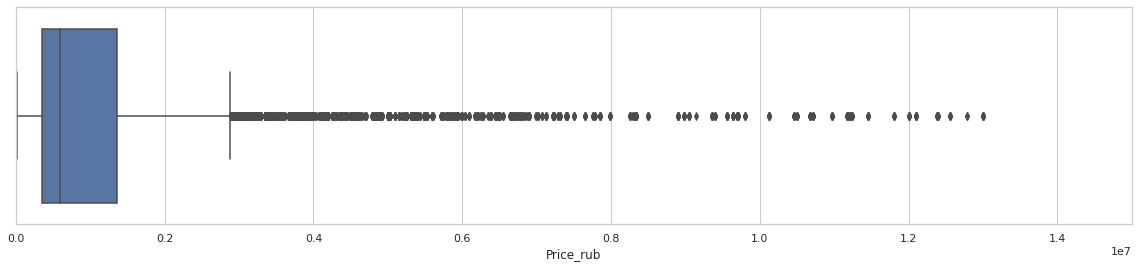

In [40]:
f = plt.figure(figsize=(20, 4))
sns.set(style="whitegrid")
ax = sns.boxplot(x=df["Price_rub"])
ax.set(xlim=(0, 15000000))

[(0.0, 2000000.0)]

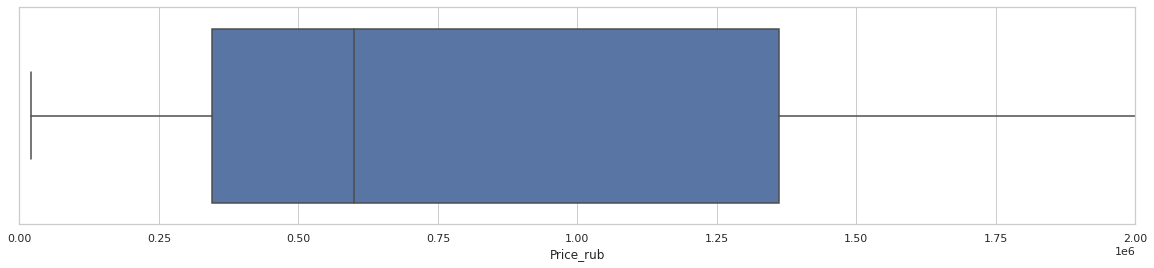

In [41]:
f = plt.figure(figsize=(20, 4))
sns.set(style="whitegrid")
ax = sns.boxplot(x=df["Price_rub"])
ax.set(xlim=(0, 2000000))

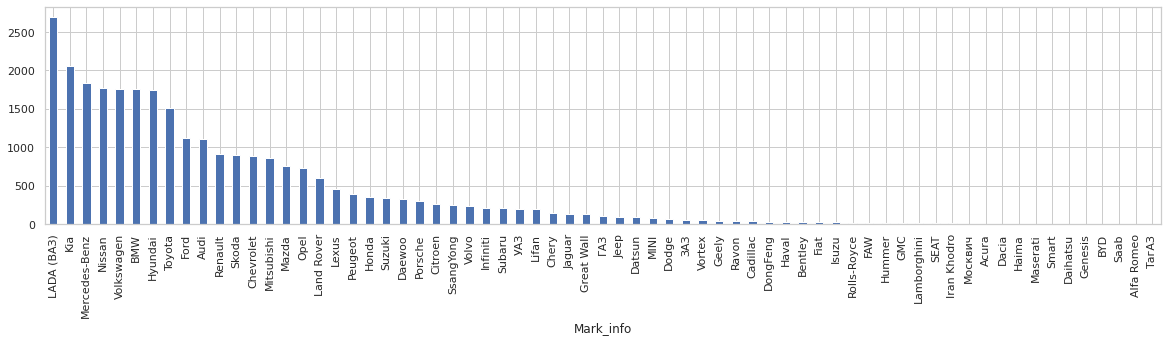

In [42]:
df_var = df.groupby(['Mark_info']).Model_info.count() 
df_var.sort_values(inplace=True, ascending=False)
df_var.plot(kind='bar', figsize = (20,4))

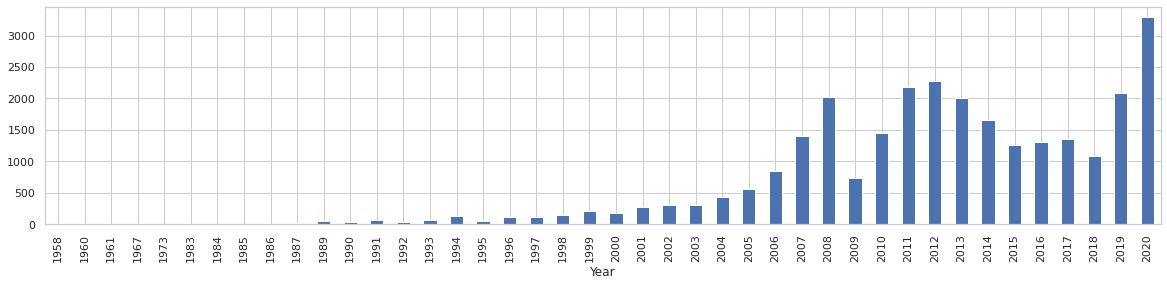

In [43]:
df_var = df.groupby(['Year']).Model_info.count() 
df_var.plot(kind='bar', figsize = (20,4))

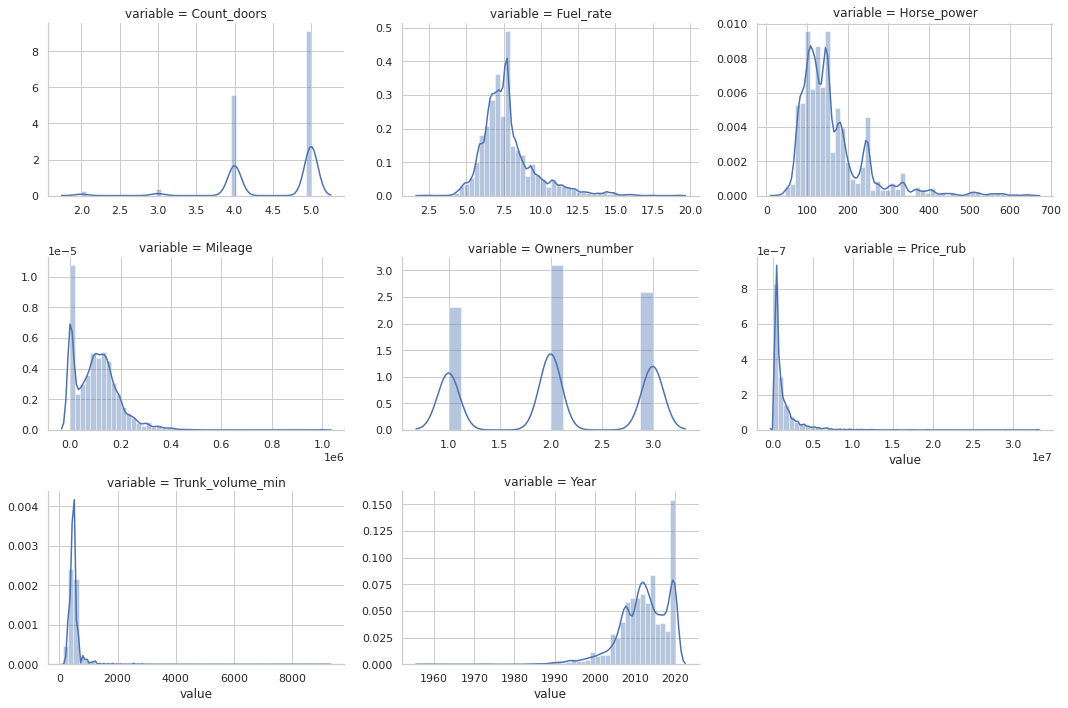

In [44]:
numeric_data = ['Year', 'Fuel_rate', 'Mileage', 'Horse_power', 'Owners_number', 'Count_doors', 'Trunk_volume_min', 'Price_rub']
f=pd.melt(df, value_vars=sorted(numeric_data))
g=sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False)
g.fig.set_figwidth(15)
g.fig.set_figheight(10)
g=g.map(sns.distplot,'value')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


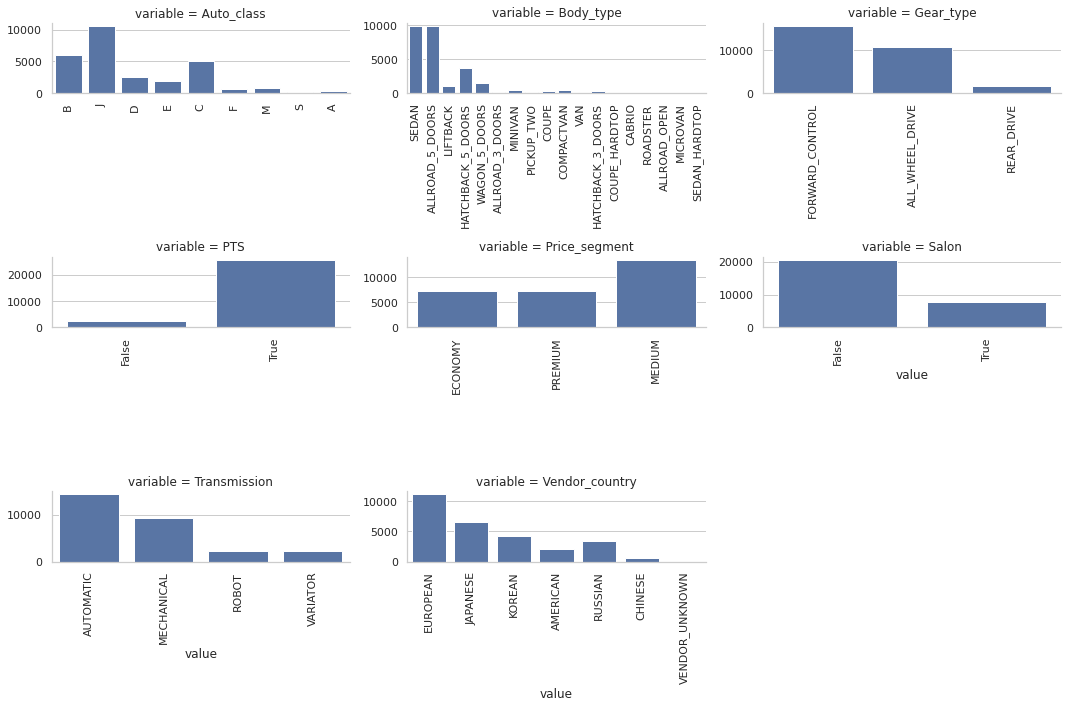

In [45]:
categorical_data = ['Price_segment', 'Transmission', 'Gear_type', 'Vendor_country', 'Body_type', 'PTS', 'Salon', 'Auto_class']
f=pd.melt(df, value_vars=sorted(categorical_data))
g=sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False)
[plt.setp(ax.get_xticklabels(), rotation = 90) for ax in g.axes.flat]
g.fig.tight_layout()
g.fig.set_figwidth(15)
g.fig.set_figheight(10)
g=g.map(sns.countplot,'value')

# Препроцессинг

In [46]:
df

,Mark_info,Model_info,Year,Price_segment,Transmission,Gear_type,Fuel_rate,Vendor_country,Region,Mileage,Horse_power,Owners_number,Body_type,PTS,Color_hex,Salon,Count_doors,Auto_class,Trunk_volume_min,Price_rub
0,Volkswagen,Polo,2011,ECONOMY,AUTOMATIC,FORWARD_CONTROL,7.0,EUROPEAN,Москва,81000,105.0,3.0,SEDAN,True,0000CC,False,4,B,460.0,279000
1,Lexus,LX,2015,PREMIUM,AUTOMATIC,ALL_WHEEL_DRIVE,14.4,JAPANESE,Екатеринбург,105500,367.0,2.0,ALLROAD_5_DOORS,True,040001,False,5,J,258.0,4570000
2,Kia,Stinger,2018,MEDIUM,AUTOMATIC,ALL_WHEEL_DRIVE,10.6,KOREAN,Воронеж,13800,370.0,1.0,LIFTBACK,True,EE1D19,False,5,D,406.0,2700000
3,Audi,Q7,2020,PREMIUM,AUTOMATIC,ALL_WHEEL_DRIVE,8.0,EUROPEAN,Москва,0,249.0,2.0,ALLROAD_5_DOORS,True,C49648,True,5,J,865.0,4805000
4,Mercedes-Benz,E-Класс,2000,PREMIUM,AUTOMATIC,REAR_DRIVE,10.2,EUROPEAN,Санкт-Петербург,405000,204.0,3.0,SEDAN,True,0000CC,False,4,E,520.0,305000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28116,Toyota,Avensis,2011,MEDIUM,MECHANICAL,FORWARD_CONTROL,6.5,JAPANESE,Екатеринбург,186600,147.0,2.0,SEDAN,True,EE1D19,False,4,D,509.0,655000
28117,Hyundai,Matrix,2008,MEDIUM,AUTOMATIC,FORWARD_CONTROL,8.3,KOREAN,Москва,159130,103.0,2.0,COMPACTVAN,True,040001,False,5,M,354.0,360000
28118,Volvo,XC90,2017,PREMIUM,AUTOMATIC,ALL_WHEEL_DRIVE,7.6,EUROPEAN,Краснодар,44600,249.0,1.0,ALLROAD_5_DOORS,True,C49648,False,5,J,310.0,3100000
28119,Nissan,Teana,2010,MEDIUM,VARIATOR,FORWARD_CONTROL,9.5,JAPANESE,Армавир,69000,182.0,2.0,SEDAN,True,040001,False,4,D,476.0,850000


### Приведение признаков к нужным типам

In [0]:
#Bool значение к бинарным
df["PTS"] = df["PTS"].astype(float)
df["Salon"] = df["Salon"].astype(float)

In [0]:
#Кодируем категориальные признаки числами

mark_encoder = preprocessing.LabelEncoder() 
mark_encoder.fit(df['Mark_info']) 
df['Mark_info'] = mark_encoder.transform(df['Mark_info']) 

model_encoder = preprocessing.LabelEncoder() 
model_encoder.fit(df['Model_info']) 
df['Model_info'] = model_encoder.transform(df['Model_info']) 

color_encoder = preprocessing.LabelEncoder() 
color_encoder.fit(df['Color_hex']) 
df['Color_hex'] = color_encoder.transform(df['Color_hex']) 

region_encoder = preprocessing.LabelEncoder() 
region_encoder.fit(df['Region']) 
df['Region'] = region_encoder.transform(df['Region'])

price_segment_encoder = preprocessing.LabelEncoder() 
price_segment_encoder.fit(df['Price_segment']) 
df['Price_segment'] = price_segment_encoder.transform(df['Price_segment'])

transmission_encoder = preprocessing.LabelEncoder() 
transmission_encoder.fit(df['Transmission']) 
df['Transmission'] = transmission_encoder.transform(df['Transmission'])

gear_type_encoder = preprocessing.LabelEncoder() 
gear_type_encoder.fit(df['Gear_type']) 
df['Gear_type'] = gear_type_encoder.transform(df['Gear_type'])

vendor_country_encoder = preprocessing.LabelEncoder() 
vendor_country_encoder.fit(df['Vendor_country']) 
df['Vendor_country'] = vendor_country_encoder.transform(df['Vendor_country'])

body_type_encoder = preprocessing.LabelEncoder() 
body_type_encoder.fit(df['Body_type']) 
df['Body_type'] = body_type_encoder.transform(df['Body_type'])

auto_class_encoder = preprocessing.LabelEncoder() 
auto_class_encoder.fit(df['Auto_class']) 
df['Auto_class'] = auto_class_encoder.transform(df['Auto_class'])

### Матрица корреляции

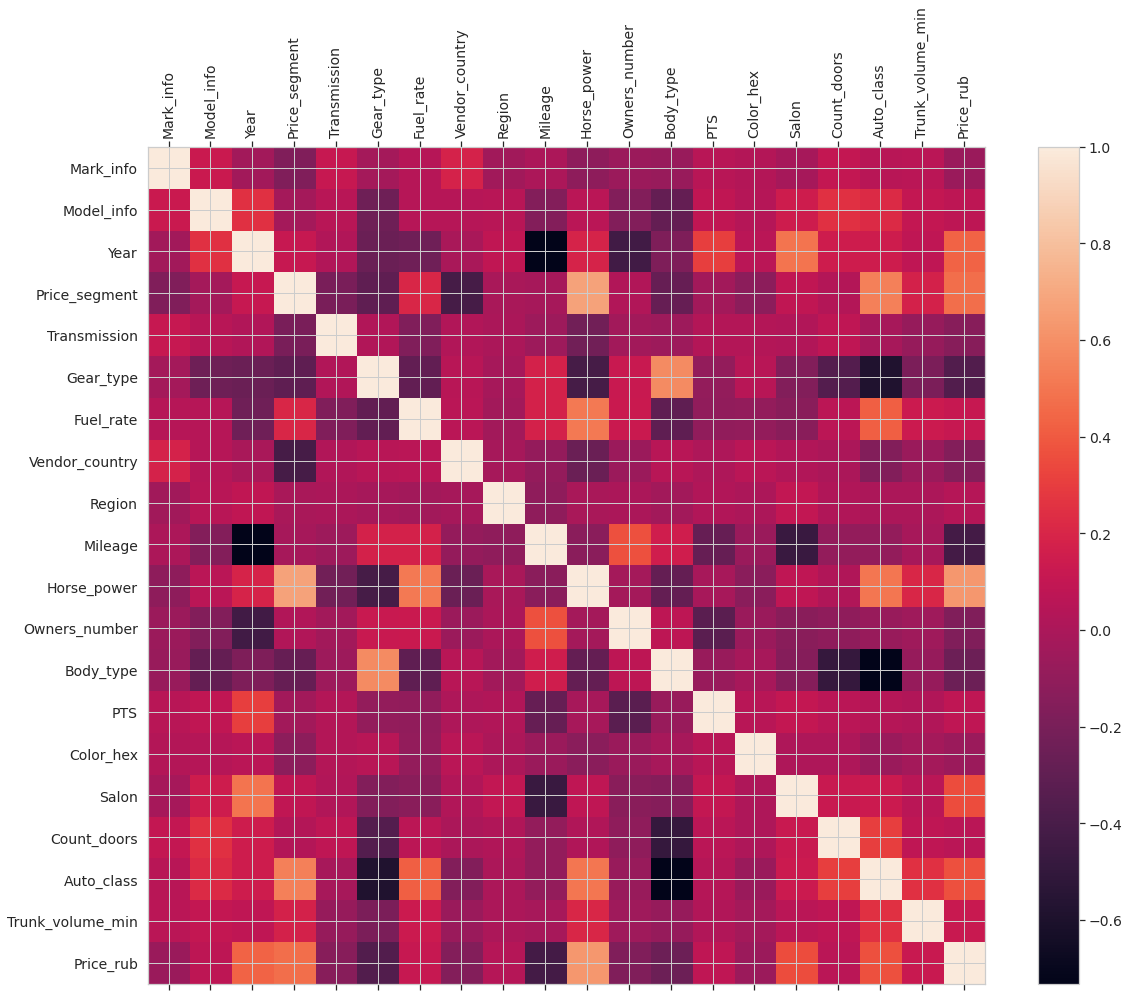

In [49]:
#Матрица корреляции
f = plt.figure(figsize=(19, 15))
df_var = df
df_var
plt.matshow(df_var.corr(), fignum=f.number)
plt.xticks(range(df_var.shape[1]), df_var.columns, fontsize=14, rotation=90)
plt.yticks(range(df_var.shape[1]), df_var.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

In [0]:
#OneHotEncoding
df = pd.get_dummies(df, columns=['Price_segment', 'Transmission','Gear_type','Vendor_country','Body_type','Auto_class'], drop_first=True)

In [51]:
df

,Mark_info,Model_info,Year,Fuel_rate,Region,Mileage,Horse_power,Owners_number,PTS,Color_hex,Salon,Count_doors,Trunk_volume_min,Price_rub,Price_segment_1,Price_segment_2,Transmission_1,Transmission_2,Transmission_3,Gear_type_1,Gear_type_2,Vendor_country_1,Vendor_country_2,Vendor_country_3,Vendor_country_4,Vendor_country_5,Vendor_country_6,Body_type_1,Body_type_2,Body_type_3,Body_type_4,Body_type_5,Body_type_6,Body_type_7,Body_type_8,Body_type_9,Body_type_10,Body_type_11,Body_type_12,Body_type_13,Body_type_14,Body_type_15,Body_type_16,Body_type_17,Auto_class_1,Auto_class_2,Auto_class_3,Auto_class_4,Auto_class_5,Auto_class_6,Auto_class_7,Auto_class_8
0,59,353,2011,7.0,176,81000,105.0,3.0,1.0,0,0.0,4,460.0,279000,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
1,37,276,2015,14.4,93,105500,367.0,2.0,1.0,2,0.0,5,258.0,4570000,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,33,427,2018,10.6,63,13800,370.0,1.0,1.0,11,0.0,5,406.0,2700000,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,2,364,2020,8.0,176,0,249.0,2.0,1.0,8,1.0,5,865.0,4805000,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,42,168,2000,10.2,261,405000,204.0,3.0,1.0,0,0.0,4,520.0,305000,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28116,58,91,2011,6.5,93,186600,147.0,2.0,1.0,11,0.0,4,509.0,655000,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
28117,27,306,2008,8.3,176,159130,103.0,2.0,1.0,2,0.0,5,354.0,360000,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
28118,60,490,2017,7.6,137,44600,249.0,1.0,1.0,8,0.0,5,310.0,3100000,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
28119,44,436,2010,9.5,15,69000,182.0,2.0,1.0,2,0.0,4,476.0,850000,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [52]:
df.describe()

,Mark_info,Model_info,Year,Fuel_rate,Region,Mileage,Horse_power,Owners_number,PTS,Color_hex,Salon,Count_doors,Trunk_volume_min,Price_rub,Price_segment_1,Price_segment_2,Transmission_1,Transmission_2,Transmission_3,Gear_type_1,Gear_type_2,Vendor_country_1,Vendor_country_2,Vendor_country_3,Vendor_country_4,Vendor_country_5,Vendor_country_6,Body_type_1,Body_type_2,Body_type_3,Body_type_4,Body_type_5,Body_type_6,Body_type_7,Body_type_8,Body_type_9,Body_type_10,Body_type_11,Body_type_12,Body_type_13,Body_type_14,Body_type_15,Body_type_16,Body_type_17,Auto_class_1,Auto_class_2,Auto_class_3,Auto_class_4,Auto_class_5,Auto_class_6,Auto_class_7,Auto_class_8
count,28121.000000,28121.000000,28121.000000,28121.000000,28121.000000,28121.000000,28121.000000,28121.000000,28121.000000,28121.000000,28121.000000,28121.000000,28121.000000,2.812100e+04,28121.000000,28121.000000,28121.000000,28121.000000,28121.000000,28121.000000,28121.000000,28121.000000,28121.000000,28121.000000,28121.000000,28121.000000,28121.000000,28121.000000,28121.000000,28121.000000,28121.000000,28121.000000,28121.000000,28121.000000,28121.000000,28121.000000,28121.000000,28121.000000,28121.000000,28121.000000,28121.000000,28121.000000,28121.000000,28121.000000,28121.000000,28121.000000,28121.000000,28121.000000,28121.000000,28121.000000,28121.000000,28121.000000
mean,35.266491,263.614701,2012.116888,7.778721,194.382703,105004.810711,160.974823,2.034032,0.910352,6.183457,0.271150,4.538103,490.833505,1.225165e+06,0.478006,0.261371,0.329185,0.081398,0.080260,0.556666,0.062551,0.021692,0.395861,0.234878,0.150101,0.124640,0.000462,0.350521,0.000284,0.000605,0.014864,0.014295,0.001316,0.013798,0.131396,0.037232,0.000676,0.015362,0.005370,0.000569,0.349525,0.000747,0.002063,0.052061,0.213684,0.181004,0.091426,0.068205,0.021870,0.375662,0.030582,0.005121
std,17.377477,144.934394,6.203567,1.804770,73.566044,85461.577060,83.726900,0.782236,0.285682,4.368949,0.444561,0.630243,229.757551,1.860919e+06,0.499525,0.439389,0.469925,0.273451,0.271701,0.496787,0.242158,0.145678,0.489043,0.423930,0.357177,0.330316,0.021496,0.477142,0.016865,0.024580,0.121012,0.118708,0.036250,0.116652,0.337839,0.189333,0.025985,0.122991,0.073082,0.023847,0.476829,0.027317,0.045369,0.222153,0.409913,0.385028,0.288220,0.252102,0.146261,0.484302,0.172186,0.071377
min,0.000000,0.000000,1958.000000,2.100000,0.000000,0.000000,33.000000,1.000000,0.000000,0.000000,0.000000,2.000000,110.000000,2.000000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,139.000000,2008.000000,6.700000,176.000000,35000.000000,107.000000,1.000000,1.000000,2.000000,0.000000,4.000000,400.000000,3.450000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,281.000000,2012.000000,7.500000,176.000000,100000.000000,141.000000,2.000000,1.000000,7.000000,0.000000,5.000000,470.000000,5.990000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,46.000000,384.000000,2017.000000,8.300000,261.000000,151000.000000,184.000000,3.000000,1.000000,11.000000,1.000000,5.000000,530.000000,1.361300e+06,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000

### Разделение на предикторов и целевую переменную

In [0]:
#разделение на предикторов и на целевую переменную
X=df.drop(columns=['Price_rub'])
Y=df[['Price_rub']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 0) 

### Нормализация данных

In [0]:
#нормализация данных
scaler_X = StandardScaler() 
X_train = scaler_X.fit_transform(X_train)

# scaler_Y = StandardScaler()
# Y_train = scaler_Y.fit_transform(Y_train)

In [55]:
X_train

array([[ 0.38957751, -0.3575195 ,  0.62395324, ...,  1.2896488 ,
        -0.17628176, -0.07323175],
       [-0.07068301, -1.68150418, -1.1391181 , ..., -0.7754049 ,
        -0.17628176, -0.07323175],
       [-0.99120406, -0.48853882, -1.29939732, ..., -0.7754049 ,
        -0.17628176, -0.07323175],
       ...,
       [ 0.50464264,  1.46985519,  0.62395324, ...,  1.2896488 ,
        -0.17628176, -0.07323175],
       [ 0.38957751, -0.34372799,  0.62395324, ...,  1.2896488 ,
        -0.17628176, -0.07323175],
       [-0.99120406, -0.48853882, -0.81855968, ..., -0.7754049 ,
        -0.17628176, -0.07323175]])

In [56]:
Y_train = Y_train['Price_rub'].values
Y_train

array([3000000,   88000,  155000, ...,  915000, 4700000,  256200])

# Задача регрессии
Основная задача в рамках данной работы - максимально точно предсказать стоимость автомобился, основываясь на его характеристиках

**Используемые метрики:**
* __Среднеквадратичная ошибка (Mean Squared Error)__  
$$MSE = \frac{1}{n}\sum_{i=1}^{n}(a(x_{i}) - y_{i})^2$$
* __Корень среднеквадратичной ошибки (Root Mean Squared Error)__
$$RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(a(x_{i}) - y_{i})^2}$$
* __Средняя абсолютная ошибка (Mean absolute error)__
$$MAE = \frac{1}{n}\sum_{i=1}^{n}\left |a(x_{i}) - y_{i}\right |$$
* __Коэффициент детерминации__  
<br>
Используется для сравнения модели $a(x)$ со средним значением целевой переменной по набору данных (__baseline__)
$$R^{2} = 1 - \frac{\sum_{i=1}^{n}(a(x) - y_{i})^{2}}{\sum_{i=1}^{n}(\overline{y} - y_{i})^{2}},$$ где $\overline{y}$ - среднее значение целевой переменной по наблюдаемым данным.
* __Медианная абсолютная ошибка (Median Absolute error)__

Далее представлены варианты построения регрессионных моделей + функция для построения графиков и расчета метрик, а также функции для нахождения лучших гиперпараметров с помощью кросс-валидации



In [0]:
def getPlotAndMetrics(predictedDependentVariables, testDependentVariables, name):
    plt.figure(figsize=(15,3),dpi=80)
    plt.plot(predictedDependentVariables[1:100], 'r-', label='Predicted')
    plt.plot(testDependentVariables[1:100].values, 'b-', label='Correct')
    plt.xlabel("Observations: " + name + " Regression ")
    plt.ylabel("G3")
    plt.legend(loc='best')
    plt.show()
 
    mse = metrics.mean_squared_error(y_pred=predictedDependentVariables, 
                                     y_true=testDependentVariables)
    rmse = np.sqrt(mse)

    mae = metrics.mean_absolute_error(y_pred=predictedDependentVariables, 
                                      y_true=testDependentVariables)

    medae = metrics.median_absolute_error(y_pred=predictedDependentVariables, 
                                          y_true=testDependentVariables)
    
    R2 = metrics.r2_score(y_pred=predictedDependentVariables, 
                      y_true=testDependentVariables)
    print("MSE:   {}\nRMSE:  {}\nR2:    {}\nMAE:   {}\nMedAE: {}".format(mse, rmse, R2, mae, medae))

In [0]:
def linearModel(df):
    (trainData, 
     testData, 
     trainDependentVariables, 
     testDependentVariables) = train_test_split(df.drop('Price_rub', axis=1),
                                                df['Price_rub'],
                                                test_size=0.3, 
                                                shuffle=True)

    regressionModel = LinearRegression()
    regressionModel.fit(trainData, trainDependentVariables)
    predictedDependentVariables = regressionModel.predict(testData)
    getPlotAndMetrics(predictedDependentVariables, testDependentVariables, "Linear")
    return predictedDependentVariables

In [0]:
def theBestAlphaRidge(df):
    (trainData, 
     testData, 
     trainDependentVariables, 
     testDependentVariables) = train_test_split(df.drop('Price_rub', axis=1),
                                                df['Price_rub'],
                                                test_size=0.3, 
                                                shuffle=True)
    alphas = []
    scores_mean = []
    for i in range(1, 99):
        ridgeModel = Ridge(alpha = i * 0.25)
        ridgeModel.fit(trainData, trainDependentVariables)
        scores = cross_val_score(ridgeModel, df.drop('Price_rub', axis=1), df['Price_rub'], cv = 10)
        avg_cross_val_score = mean(scores)*100
        scores_mean.append(avg_cross_val_score)
        alphas.append(i*0.25)
    print("The best parametr:", alphas[scores_mean.index(max(scores_mean))])
    
    return alphas[scores_mean.index(max(scores_mean))]


def RidgeModel(df):
    (trainData, 
     testData, 
     trainDependentVariables, 
     testDependentVariables) = train_test_split(df.drop('Price_rub', axis=1),
                                                df['Price_rub'],
                                                test_size=0.3, 
                                                shuffle=True)

    ridgeModel = Ridge(alpha=theBestAlphaRidge(df))
    ridgeModel.fit(trainData, trainDependentVariables)
    predictedDependentVariables = ridgeModel.predict(testData)
    
    getPlotAndMetrics(predictedDependentVariables, testDependentVariables, "Ridge")
    return predictedDependentVariables

In [0]:
def elasticNetModel(df, alpha, l1):
    (trainData, 
     testData, 
     trainDependentVariables, 
     testDependentVariables) = train_test_split(df.drop('Price_rub', axis=1),
                                                df['Price_rub'],
                                                test_size=0.3, 
                                                shuffle=True)
    enModel = ElasticNet(random_state=0)
    enModel.fit(trainData, trainDependentVariables)
    predictedDependentVariables = enModel.predict(testData)
    
    getPlotAndMetrics(predictedDependentVariables, testDependentVariables, "ElasticNet")
    print(enModel.coef_)
    return predictedDependentVariables

In [0]:
def PolynomialRegression(df, degree):
    (trainData, 
     testData, 
     trainDependentVariables, 
     testDependentVariables) = train_test_split(df.drop('Price_rub', axis=1),
                                                df['Price_rub'],
                                                test_size=0.3, 
                                                shuffle=True)

    polyModel = PolynomialFeatures(degree=degree)
    X1 = polyModel.fit_transform(trainData)
    regrModel = LinearRegression()
    regrModel.fit(X1, trainDependentVariables)
    predictedDependentVariables = regrModel.predict(polyModel.fit_transform(testData))
    
    getPlotAndMetrics(predictedDependentVariables, testDependentVariables, "Polynomial")

    return predictedDependentVariables

In [0]:
def theBestNumber(df):
    (trainData, 
     testData, 
     trainDependentVariables, 
     testDependentVariables) = train_test_split(df.drop('Price_rub', axis=1),
                                                df['Price_rub'],
                                                test_size=0.3, 
                                                shuffle=True)
    alphas = []
    scores_mean = []
    for i in range(1, 99):
        knrModel = KNeighborsRegressor(n_neighbors=i)
        knrModel.fit(trainData, trainDependentVariables)
        scores = cross_val_score(knrModel, df.drop('Price_rub', axis=1), df['Price_rub'], cv = 10)
        avg_cross_val_score = mean(scores)*100
        scores_mean.append(avg_cross_val_score)
        alphas.append(i)
    print("The best parametr:", alphas[scores_mean.index(max(scores_mean))])
    return alphas[scores_mean.index(max(scores_mean))]

In [0]:
def KNN(data):
    (trainData, 
     testData, 
     trainDependentVariables, 
     testDependentVariables) = train_test_split(df.drop('Price_rub', axis=1),
                                                df['Price_rub'],
                                                test_size=0.3, 
                                                shuffle=True)
    
    knrModel = KNeighborsRegressor(n_neighbors=theBestNumber(df))
    knrModel.fit(trainData, trainDependentVariables)
    predictedDependentVariables = knrModel.predict(testData)

    getPlotAndMetrics(predictedDependentVariables, testDependentVariables, "KNN")
    
    return predictedDependentVariables

In [0]:
def DecisionTreeModel(df):
    (trainData, 
     testData, 
     trainDependentVariables, 
     testDependentVariables) = train_test_split(df.drop('Price_rub', axis=1),
                                                df['Price_rub'],
                                                test_size=0.3, 
                                                shuffle=True)

    dsModel = DecisionTreeRegressor(random_state = 0) 
    dsModel.fit(trainData, trainDependentVariables)
    predictedDependentVariables = dsModel.predict(testData)

    getPlotAndMetrics(predictedDependentVariables, testDependentVariables, "Decision Tree")
    
    return predictedDependentVariables

### Линейная регрессия

Linear Regression


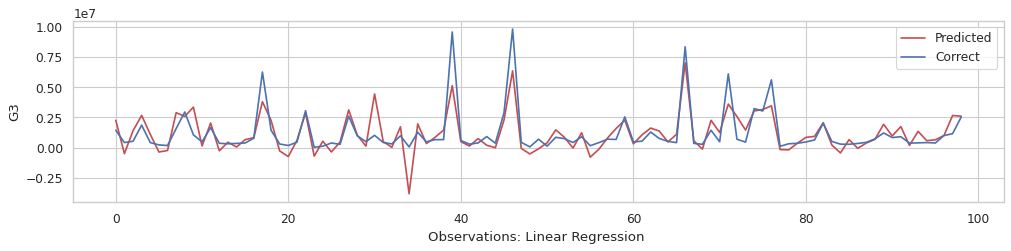

MSE:   1339569044199.4236
RMSE:  1157397.5307557138
R2:    0.6016669203623477
MAE:   606669.8501534373
MedAE: 382642.50375860184


In [70]:
print('Linear Regression')
linearPrediction_portugalG1 = linearModel(df)

# Регуляризация
(метод добавления некоторых дополнительных ограничений к условию с целью решить некорректно поставленную задачу или предотвратить переобучение.)
* __Гребневая регрессия - L2 регуляризация__
* __Лассо регрессия - L1 регуляризация__
* __ElasticNet - комбинация обоих видов регуляризации__

### Гребневая регрессия

In [57]:
ridgePrediction = RidgeModel(df)

NameError: ignored

### ElacticNet 

In [58]:
print('Elastic Net model')
enPrediction_ = elasticNetModel(df, 7, 5)

Elastic Net model


NameError: ignored

### PolynomialRegression

In [59]:
print('Polynomial Regression')
polyPrediction = PolynomialRegression(df, 2)

Polynomial Regression


NameError: ignored

### KNN

In [60]:
print('KNN')
knnPrediction = KNN(df)

KNN


NameError: ignored

### Деревья решений

In [61]:
print('DecisionTreeModel')
dtPrediction_portugalG1 = DecisionTreeModel(df)

DecisionTreeModel


NameError: ignored

# Нейронные сети

### Подбор архитектуры нейронной сети

In [0]:
def build_model(hp):
    model = keras.Sequential()
    #activation_choice = hp.Choice('activation', values=['relu', 'sigmoid', 'tanh', 'elu', 'selu'])    
    model.add(keras.layers.Dense(units=hp.Int('units_input',    # Полносвязный слой с разным количеством нейронов
                                   min_value=512,    # минимальное количество нейронов - 128
                                   max_value=1024,   # максимальное количество - 1024
                                   step=32),
                    input_dim=X_train.shape[1],
                    activation='relu'))
    model.add(keras.layers.Dense(units=hp.Int('units_hidden',        
                                   min_value=128,   
                                   max_value=600,   
                                   step=32),
                    activation='relu'))   
    model.add(keras.layers.Dense(1))
    model.compile(
        optimizer=hp.Choice('adam', values=['adam','rmsprop','SGD']),
        loss='mse',
        metrics=['mae'])
    return model

In [0]:
tuner = RandomSearch(
    build_model,                 # функция создания модели
    objective='mae',    # метрика, которую нужно оптимизировать - 
                                 # доля правильных ответов на проверочном наборе данных
    max_trials=80,               # максимальное количество запусков обучения 
    directory='/content/drive/My Drive/Курсач/Colab Notebooks/models'   # каталог, куда сохраняются обученные сети  
    )

INFO:tensorflow:Reloading Oracle from existing project /content/drive/My Drive/Курсач/Colab Notebooks/models/untitled_project/oracle.json
INFO:tensorflow:Reloading Tuner from /content/drive/My Drive/Курсач/Colab Notebooks/models/untitled_project/tuner0.json


In [0]:
tuner.search_space_summary()

In [0]:
tuner.search(X_train,                  # Данные для обучения
             Y_train,                  # Правильные ответы
             batch_size=20,             # Размер мини-выборки
             epochs=20,                # Количество эпох обучения 
             validation_split=0.2,    # Часть данных, которая будет использоваться для проверки
             verbose=1
             )

INFO:tensorflow:Oracle triggered exit


In [0]:
tuner.results_summary()

In [0]:
models = tuner.get_best_models(num_models=3)

### Результаты подбора параметров нейросети 

In [0]:
for model in models:
  model.summary()
  model.evaluate(X_test, Y_test)
  print() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 928)               48256     
_________________________________________________________________
dense_1 (Dense)              (None, 384)               356736    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 385       
Total params: 405,377
Trainable params: 405,377
Non-trainable params: 0
_________________________________________________________________
176/176 [==============================] - 0s 2ms/step - loss: 591364292608.0000 - mae: 252753.5625

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 640)               33280     
_____________________________________________________________

In [0]:
#архитектура нейронной сети
model = keras.Sequential()

model.add(keras.layers.Dense(928, activation = 'relu', input_shape = (X_train.shape[1],)))
model.add(keras.layers.Dense(384, activation = 'relu'))
model.add(keras.layers.Dense(1))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [0]:
history = model.fit(X_train, Y_train, batch_size = 10, epochs=100)

Epoch 1/100
2250/2250 [==============================] - 10s 5ms/step - loss: 1036375359488.0000 - mae: 458987.2500
Epoch 2/100
 983/2250 [============>.................] - ETA: 5s - loss: 882376048640.0000 - mae: 421284.9688

KeyboardInterrupt: ignored

In [0]:
model.evaluate(X_test, Y_test)

In [0]:
#кросс валидация
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True)
skf.get_n_splits(X_train, Y_train)
print(skf)
for train_index, test_index in skf.split(X_train, Y_train):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train_skf, X_val_skf = X_train[train_index], X_train[test_index]
  Y_train_skf, Y_val_skf = Y_train[train_index], Y_train[test_index]
  history = model.fit(X_train_skf, Y_train_skf, validation_data=(X_val_skf, Y_val_skf), batch_size = 10, epochs=20)
#     train_data = df[train]
#     train_labels = labels[train]
#     x_train = train_data[:int(-0.1*len(train))]
#     y_train = train_labels[:int(-0.1*len(train))]
#     x_val = train_data[int(-0.1*len(train)):]
#     y_val = train_labels[int(-0.1*len(train)):]
#     x_test = data[test]
#     y_test = labels[test]
#     model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100, batch_size=500, callbacks=[early_stop, checkpoint])
#     y_pred=loaded_model.predict(x_test, verbose=0) 
#     '''Loaded_model is the best model saved on the disk 
#     during the training process based on the validation dataset'''

2025/2025 [==============================] - 9s 5ms/step - loss: 823502569472.0000 - mae: 344709.9688 - val_loss: 1117713596416.0000 - val_mae: 357217.5000
Epoch 4/20
2025/2025 [==============================] - 9s 4ms/step - loss: 786366529536.0000 - mae: 331157.4375 - val_loss: 1078538600448.0000 - val_mae: 340941.6250
Epoch 5/20
2025/2025 [==============================] - 9s 4ms/step - loss: 753759420416.0000 - mae: 317373.6250 - val_loss: 1043088736256.0000 - val_mae: 328609.6875
Epoch 6/20
2025/2025 [==============================] - 9s 4ms/step - loss: 725074051072.0000 - mae: 306919.2812 - val_loss: 1006784020480.0000 - val_mae: 319355.8750
Epoch 7/20
2025/2025 [==============================] - 9s 4ms/step - loss: 697051840512.0000 - mae: 299904.6250 - val_loss: 979430539264.0000 - val_mae: 307400.2188
Epoch 8/20
2025/2025 [==============================] - 9s 5ms/step - loss: 672165003264.0000 - mae: 288410.9062 - val_loss: 942312980480.0000 - val_mae: 301946.4375
Epoch 9/20


In [0]:
X_test = scaler_X.transform(X_test)

# Нейросеть для определённого производителя

In [0]:
df=pd.read_csv('/content/drive/My Drive/Курсач/Colab Notebooks/autoRuBmw.csv', sep = ';')

In [0]:
df

In [0]:
df = df.drop(['Mark_info'], axis = 1)

In [0]:
df

In [0]:
#Заполняем пропуски
df['Vin_resolution'].fillna(True, inplace=True)
df['Owners_number'].fillna(2, inplace=True)
df['PTS'].fillna(False, inplace=True)
df['Trunk_volume_min'].fillna(458, inplace=True)
df['Auto_class'].fillna('J', inplace=True)

In [0]:
#Bool значение к бинарным
df["Vin_resolution"] = df["Vin_resolution"].astype(float)
df["PTS"] = df["PTS"].astype(float)
df["Salon"] = df["Salon"].astype(float)

In [0]:
#Кодируем категориальные признаки числами

model_encoder = preprocessing.LabelEncoder() 
model_encoder.fit(df['Model_info']) 
df['Model_info'] = model_encoder.transform(df['Model_info']) 

color_encoder = preprocessing.LabelEncoder() 
color_encoder.fit(df['Color_hex']) 
df['Color_hex'] = color_encoder.transform(df['Color_hex']) 

region_encoder = preprocessing.LabelEncoder() 
region_encoder.fit(df['Region']) 
df['Region'] = region_encoder.transform(df['Region'])


body_type_encoder = preprocessing.LabelEncoder() 
body_type_encoder.fit(df['Body_type']) 
df['Body_type'] = body_type_encoder.transform(df['Body_type']) 

auto_class_encoder = preprocessing.LabelEncoder() 
auto_class_encoder.fit(df['Auto_class']) 
df['Auto_class'] = auto_class_encoder.transform(df['Auto_class']) 

In [0]:
#OneHotEncoding
df = pd.get_dummies(df, columns=['Model_info','Body_type','Auto_class'], drop_first=True)

In [0]:
df.describe()

In [0]:
#разделение на предикторов и на целевую переменную
X=df.drop(columns=['Price_rub'])
Y=df[['Price_rub']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 0) 

In [0]:
#нормализация данных
scaler_X = StandardScaler() 
X_train = scaler_X.fit_transform(X_train)

# scaler_Y = StandardScaler()
# Y_train = scaler_Y.fit_transform(Y_train)

In [0]:
#архитектура нейронной сети
model = keras.Sequential()

model.add(keras.layers.Dense(64, activation = 'relu', input_shape = (55,)))
model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [0]:
hist = model.fit(X_train, Y_train, batch_size = 1, epochs=100)